In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
np.random.seed(42)

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

##### Dropping NaN values

In [4]:
df.dropna(inplace=True)

##### Parsing Dt_Customer

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Dt_Customer is used to generate Customer_For, which is the number of days the customer has been registered in the database, relative to the date of the newest customer

In [6]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce')

In [7]:
print('Marital_Status:\n', df['Marital_Status'].value_counts())
print('Education:\n', df['Education'].value_counts())

Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


#### Feature Engineering
* Extract the **'Age'** of a customer by the **'Year_Birth'**.
* Create a feature **'Spent'** indicating the total amount spent by the customer.
* Create a feature **'Living_With'** out of **'Marital_Status'**.
* Create a feature **'Children'** to indicate the number of children in a household.
* Create a feature **'Family_Size'**.
* Create a feature **'Is_Parent'** to indicate parenthood status.
* Create three categories in **'Education'** by mapping the original values
* Drop redundant features

In [8]:
df['Age'] = 2022-df['Year_Birth']
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

df = df.rename(columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [10]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 576x396 with 0 Axes>

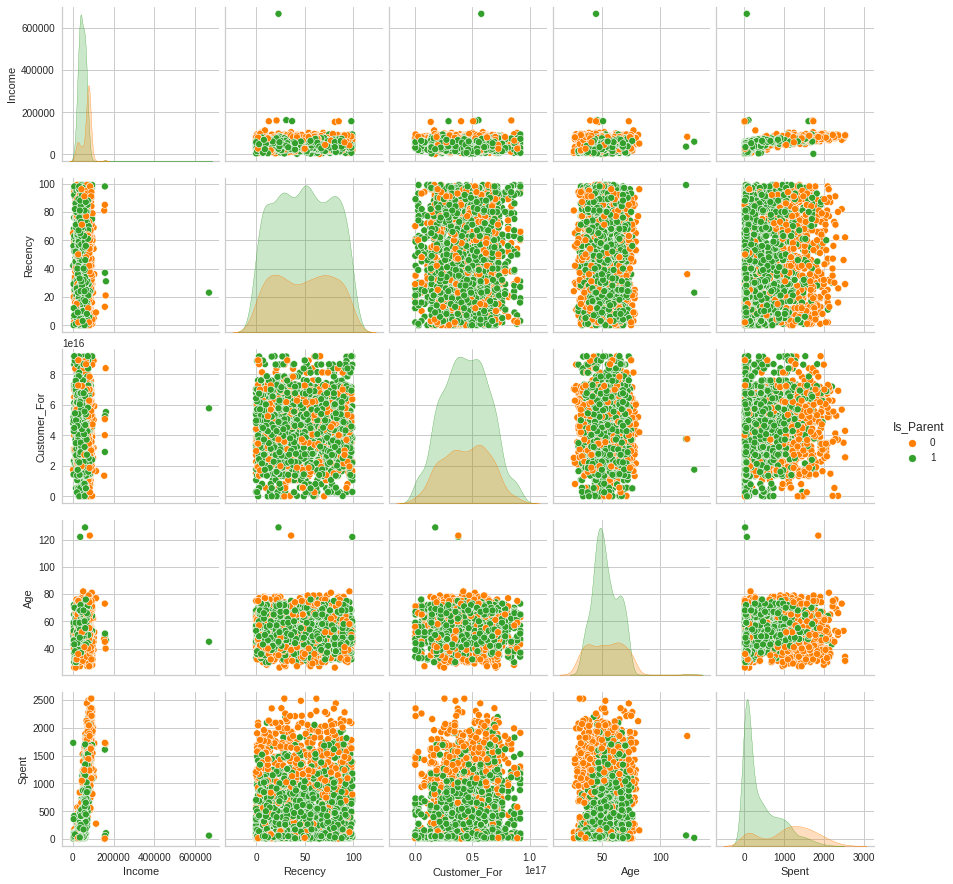

In [11]:
plot_features = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']

plt.figure()
sns.pairplot(df[plot_features], hue='Is_Parent', palette='Paired_r')
plt.show()

##### Removing outliers

In [12]:
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 200000)]

##### Analyzing correlations

<AxesSubplot:>

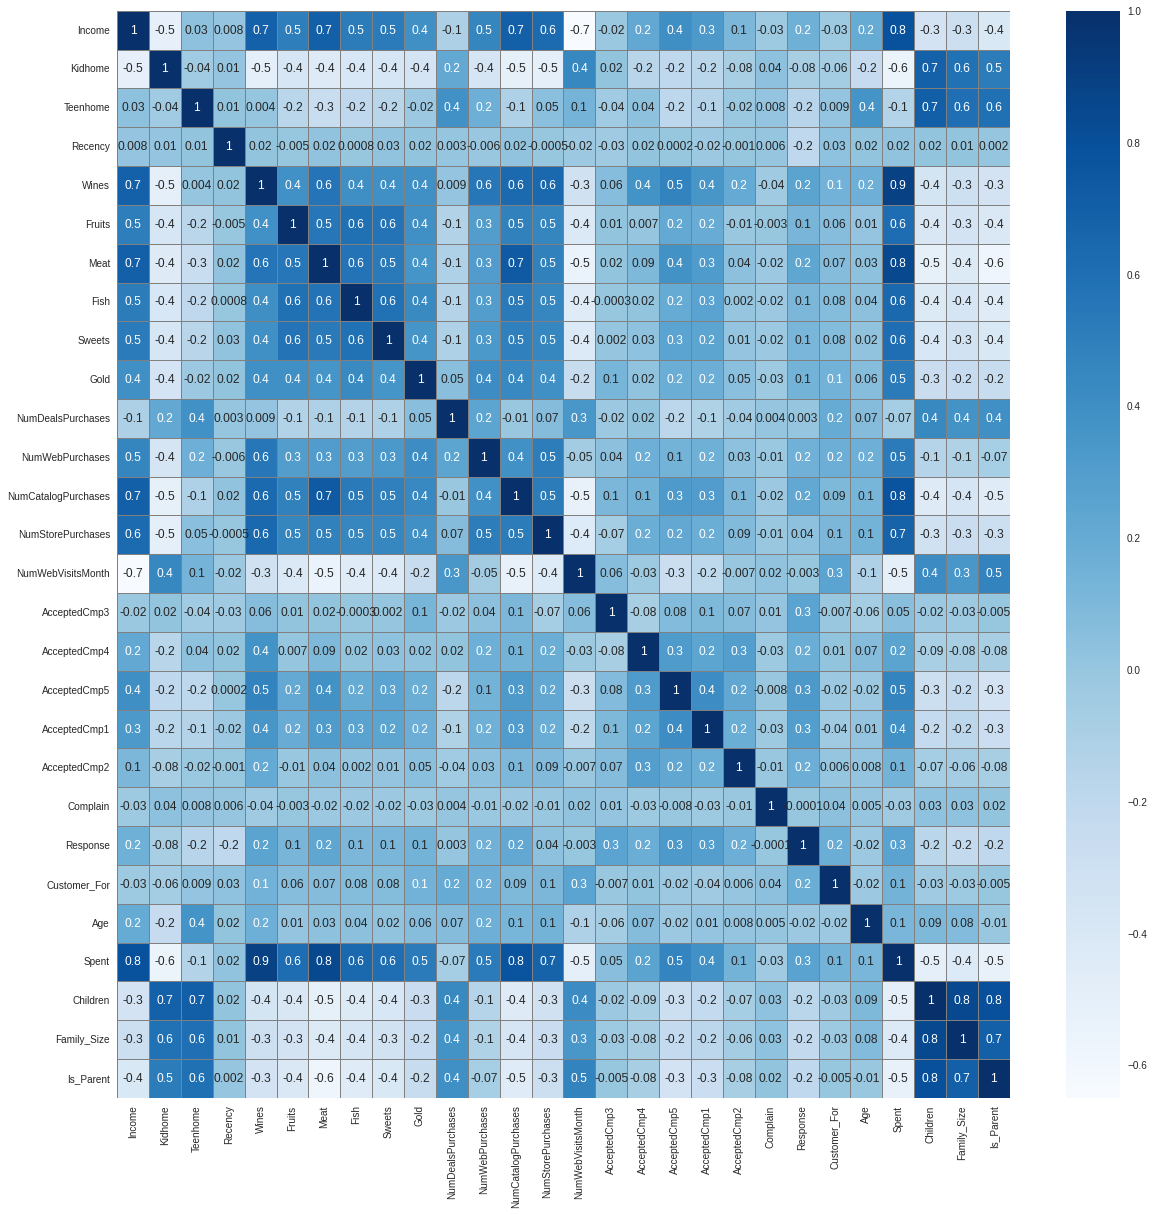

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='Blues', linewidths=0.5, linecolor='grey')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

# Preprocessing

In [15]:
le = LabelEncoder()
for i in ['Education','Living_With']:
    df[i] = df[[i]].apply(le.fit_transform)

data = df.copy()

scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns= df.columns)
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.117256,-0.09552,2.375425,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.117256,-0.09552,-0.420977,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.117256,-0.09552,-0.420977,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.117256,-0.09552,-0.420977,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.117256,-0.09552,-0.420977,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,-0.117256,-0.09552,-0.420977,0.124112,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.117256,-0.09552,-0.420977,-1.940414,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,-0.117256,-0.09552,-0.420977,-0.847936,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,-0.117256,-0.09552,-0.420977,-0.843635,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


In [16]:
df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'], inplace=True)
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.124112,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,-1.940414,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-0.847936,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,-0.843635,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


# Dimensionality Reduction using PCA

In [17]:
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=(['col1', 'col2', 'col3']))
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.139550e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,4.497106e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,3.854662e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


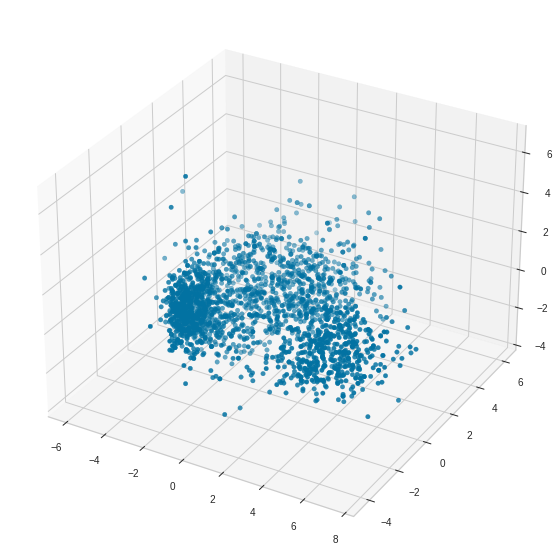

In [18]:
x = df_pca['col1']
y = df_pca['col2']
z = df_pca['col3']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

# Clustering

##### Elbow method to determine optimal number of clusters

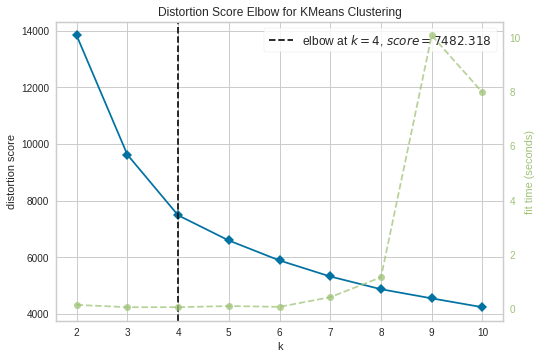

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

#### Agglomerative Clustering

In [20]:
KM = KMeans(n_clusters=4)
y_pred = KM.fit_predict(df_pca)
df_pca['Cluster'] = y_pred
df['Cluster'] = y_pred
data['Cluster'] = y_pred
df_pca

,col1,col2,col3,Cluster
0,4.994347,-0.151236,2.648081,1
1,-2.884455,-0.006671,-1.863867,0
2,2.617864,-0.720757,-0.252088,1
3,-2.676036,-1.541970,-0.922537,2
4,-0.649591,0.209831,-0.021196,0
...,...,...,...,...
2207,2.321341,2.436323,0.520721,3
2208,-3.105957,4.020986,-1.499033,0
2209,2.673666,-1.869183,0.592662,1
2210,1.494055,1.701859,-1.626902,3


##### Visualizing generated clusters

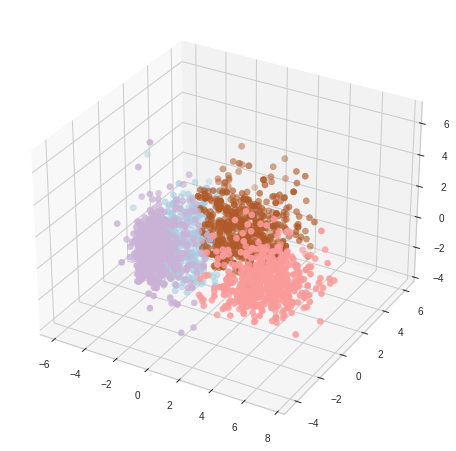

In [21]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=df_pca['Cluster'], marker='o', cmap='Paired')
plt.show()

# Model Evaluation

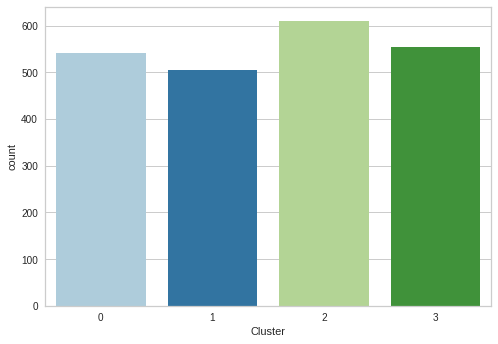

In [22]:
pl = sns.countplot(x=df_pca['Cluster'], palette='Paired')
plt.show()

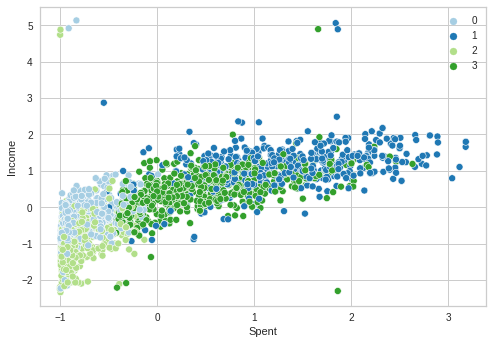

In [23]:
pl = sns.scatterplot(data=df, x=df['Spent'], y=df['Income'], hue=df['Cluster'], palette='Paired')
plt.legend()
plt.show()

The above plot shows some interesting information based on the clusters:

* Cluster 0: Average income, low spending
* Cluster 1: High income, high spending
* Cluster 2: Low income, low spending
* Cluster 3: Average income, average spending

/home/meraj/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/meraj/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/meraj/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/meraj/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


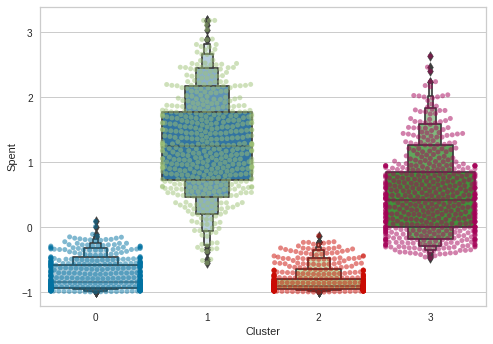

In [24]:
plt.figure()
pl = sns.swarmplot(x=df['Cluster'], y=df['Spent'], alpha=0.5)
pl = sns.boxenplot(x=df['Cluster'], y=df['Spent'], palette='Paired')
plt.show()

It is evident that cluster 1 is the largest spender, closely followed by cluster 3.

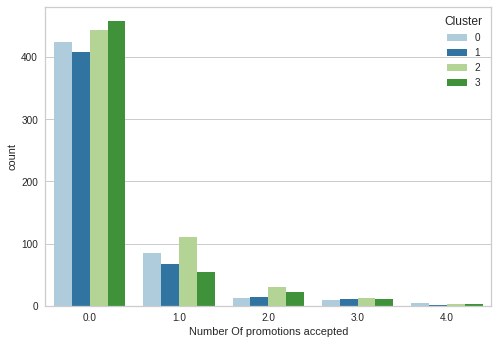

In [25]:
df['Total_Promos'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
plt.figure()
pl = sns.countplot(x=df['Total_Promos'], hue=df['Cluster'], palette='Paired')
pl.set_xlabel('Number Of promotions accepted')
plt.show()

Not many customers have partaken in the campaigns so far. To add further, nobody has participated in all 5 campaigns.

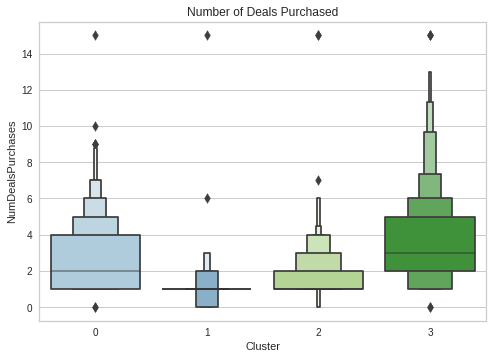

In [27]:
plt.figure()
pl = sns.boxenplot(y=data['NumDealsPurchases'], x=data['Cluster'], palette='Paired')
pl.set_title('Number of Deals Purchased')
plt.show()

Unlike the campaigns, the deals offered did well. Clusters 0 and 3 have been attracted by the deal, although cluster 1 hasn't shown much of an interest towards them.

<Figure size 576x396 with 0 Axes>

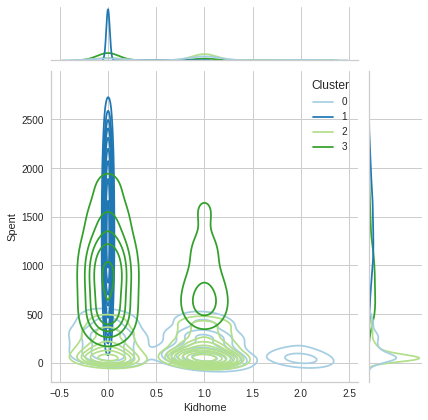

<Figure size 576x396 with 0 Axes>

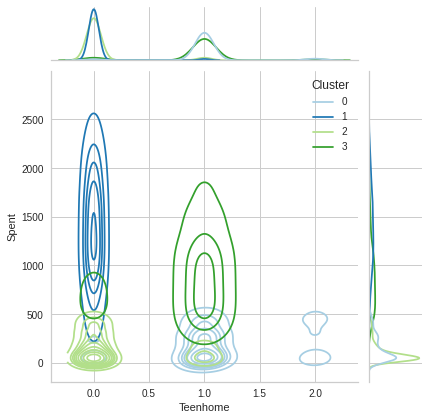

<Figure size 576x396 with 0 Axes>

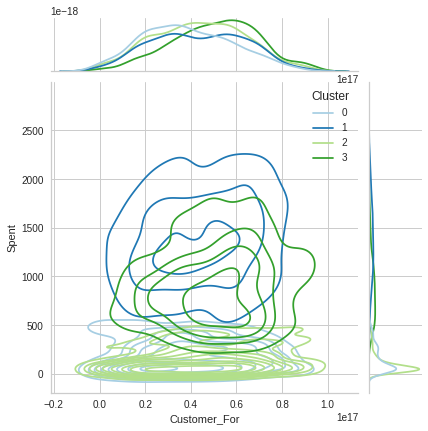

<Figure size 576x396 with 0 Axes>

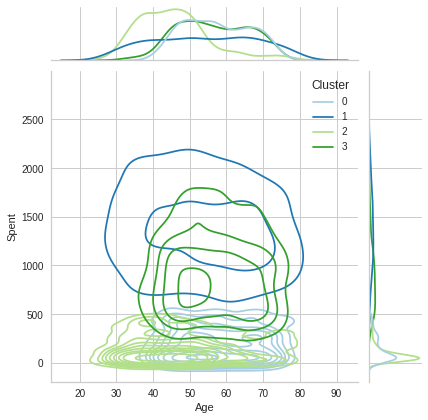

<Figure size 576x396 with 0 Axes>

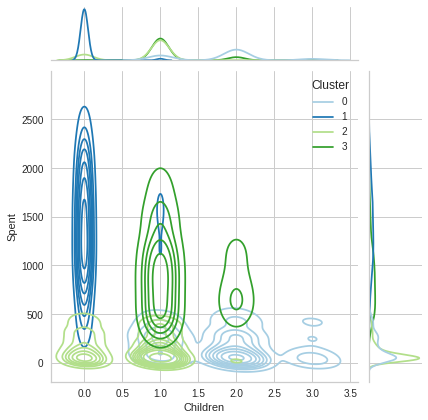

<Figure size 576x396 with 0 Axes>

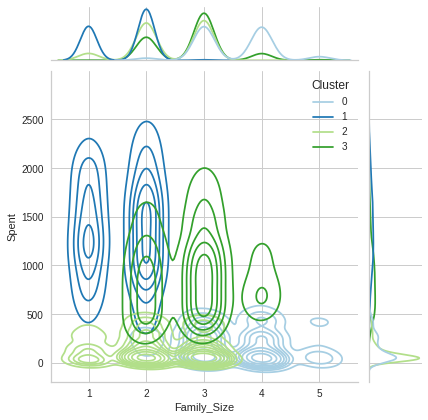

/home/meraj/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

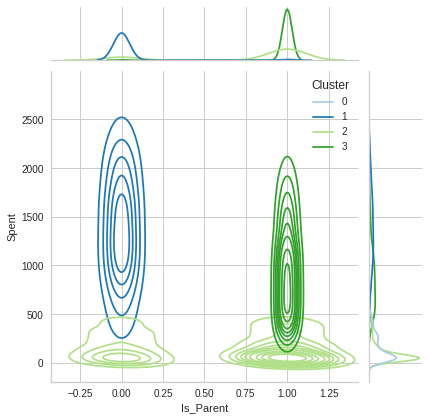

<Figure size 576x396 with 0 Axes>

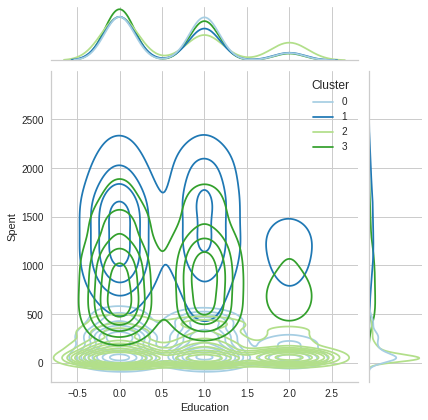

<Figure size 576x396 with 0 Axes>

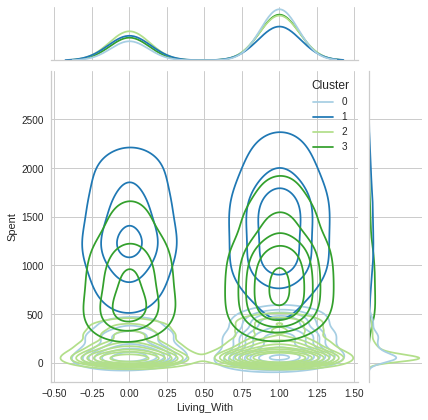

In [28]:
Personal = ['Kidhome', 'Teenhome', 'Customer_For', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data['Spent'], hue=data['Cluster'], kind='kde', palette='Paired')
    plt.show()

### Profiles

Cluster 0:
* Are definitely a parent
* Have between 2 to 4 members in the family
* Relatively older

Cluster 1:
* Are definitely not a parent
* Have a maximum of 2 members in the family
* Have high income

Cluster 2:
* Majority are parents
* Have a maximum of 3 members in the family
* Relatively younger

Cluster 4:
* Are definitely a parent
* Have either 1 or 2 members in the family
* A majority of them have a teenager at home
* Relatively older